# Get interruptions data that was extracted from downloaded kplc data

In [229]:
import pandas as pd

df = pd.read_csv("/kaggle/input/kenya-power-network-data/kplc-interruptions-data.csv")

In [230]:
df.head()

,county,area,date,time,places,file
0,NAIROBI,"KAHAWA WEST , GITHURAI 44",Monday 27.01.2025,9.00 A.M. – 5.00 P.M .,"['Zimmerman', 'Parts of Githurai 44', 'Kahawa ...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf
1,NAIROBI,NAIROBI WEST,Monday 27.01.2025,9.00 A.M. – 5.00 P.M.,"['Part of Nairobi West', 'Naimey Rd', 'ICC Ch...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf
2,NAIROBI,PART OF RUARAKA,Tuesday 28.01.2025,9.00 A.M. – 5.00 P.M .,"['Kasarani Stadium', 'Regional Centre of Mappi...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf
3,NAIROBI,PART OF KASARANI,Thursday 30.01.2025,9.00A.M . – 5.00 P.M .,"['Sunton', 'Linet Academy', 'Clay City Police'...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf
4,NAIROBI,"PART OF LANGATA, PART OF KAREN",Tuesday 28. 01.2025,9.00 A.M. – 5.00 P.M.,"['St Thomas Seminary', 'Magadi Rd', 'Bogani Ea...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf


# Sanity check

Kenya has 47 counties, if more, that's an error

Also checked county name spellings

In [231]:
df['county'].unique()

array(['NAIROBI', 'NAROK', 'UASIN GISHU', 'MERU', 'ISIOLO', 'NYERI',
       'EMBU', 'KIAMBU', 'MOMBASA', 'KILIFI', 'KWALE', 'MAKUENI',
       'MACHAKOS', 'NAKURU', 'KERICHO', 'BUSIA', 'KAKAMEGA', 'KISUMU',
       'KISII', 'MIGORI', 'KIRINYAGA', 'THARAKA NITHI', 'LAIKIPIA',
       'MURANGA', 'KITUI', 'BOMET', 'TRANS NZOIA', 'NANDI', 'VIHIGA',
       'TANA RIVER', 'MAKEUNI', 'KAJIADO', 'BUNGOMA', 'HOMABAY',
       'GARISSA', 'TURKANA', 'ELGEYO MARAKWET', 'NYAMIRA', 'NYANDARUA',
       'HOMA BAY', 'WEST POKOT', 'SIAYA', 'TAITA TAVETA', 'BARINGO',
       'LAMU', 'MARSABIT', 'KISU MU', 'SAMBURU'], dtype=object)

In [232]:
df['county'].nunique()

48

# REPLACE misspelled counties

In [233]:
df['county'] = df['county'].replace('KISU MU','KISUMU')
#lowercase county names
df['county'] = df['county'].str.lower()

df['county'] = df['county'].replace('trans nzoia','trans-nzoia')
df['county'] = df['county'].replace('tharaka nithi','tharaka-nithi')
df['county'] = df['county'].replace('muranga',  "murang'a")
df['county'] = df['county'].replace('makeuni','makueni')
df['county'] = df['county'].replace('homabay','homa bay')
df['county'] = df['county'].replace('elgeyo marakwet','elgeyo-marakwet')
df['county'] = df['county'].replace('taita taveta','taita–taveta')

In [234]:
df['county'].nunique()

45

In [235]:
df['county'].unique()

array(['nairobi', 'narok', 'uasin gishu', 'meru', 'isiolo', 'nyeri',
       'embu', 'kiambu', 'mombasa', 'kilifi', 'kwale', 'makueni',
       'machakos', 'nakuru', 'kericho', 'busia', 'kakamega', 'kisumu',
       'kisii', 'migori', 'kirinyaga', 'tharaka-nithi', 'laikipia',
       "murang'a", 'kitui', 'bomet', 'trans-nzoia', 'nandi', 'vihiga',
       'tana river', 'kajiado', 'bungoma', 'homa bay', 'garissa',
       'turkana', 'elgeyo-marakwet', 'nyamira', 'nyandarua', 'west pokot',
       'siaya', 'taita–taveta', 'baringo', 'lamu', 'marsabit', 'samburu'],
      dtype=object)

# Add kenyan county code column (common column with other datasets)

Visited https://en.wikipedia.org/wiki/Counties_of_Kenya to obtain the code an columns data

## generate the code dictionary

In [251]:
import pandas as pd
from io import StringIO

#data obtained from wikipedia
data = """
Code	County	Former Province	Area(km2)	Population(2009 Census)	Population (2019 Census)	Capital	Postal Abbreviations

001	 Mombasa	Coast	212.5	939,370	1,208,333	Mombasa	MSA
002	 Kwale	Coast	8,270.3	649,931	866,820	Kwale	KWL
003	 Kilifi	Coast	12,245.9	1,109,735	1,453,787	Kilifi	KLF
004	 Tana River	Coast	35,375.8	240,075	315,943	Hola	TRV
005	 Lamu	Coast	6,497.7	101,539	143,920	Lamu	LMU
006	 Taita–Taveta	Coast	17,083.9	284,657	340,671	Mwatate	TVT
007	 Garissa	North Eastern	45,720.2	623,060	841,353	Garissa	GRS
008	 Wajir	North Eastern	55,840.6	661,941	781,263	Wajir	WJR
009	 Mandera	North Eastern	25,797.7	1,025,756	867,457	Mandera	MDR
010	 Marsabit	Eastern	66,923.1	291,166	459,785	Marsabit	MRS
11	 Isiolo	Eastern	25,336.1	143,294	268,002	Isiolo	ISL
12	 Meru	Eastern	7,003.1	1,356,301	1,545,714	Meru	MRU
13	 Tharaka-Nithi	Eastern	2,609.5	365,330	393,177	Kathwana	TNT
14	 Embu	Eastern	2,555.9	516,212	608,599	Embu	EMB
15	 Kitui	Eastern	24,385.1	1,012,709	1,136,187	Kitui	KTU
16	 Machakos	Eastern	5,952.9	1,098,584	1,421,932	Machakos	MCK
17	 Makueni	Eastern	8,008.9	884,527	987,653	Wote	MKN
18	 Nyandarua	Central	3,107.7	596,268	638,289	Ol Kalou	NDR
19	 Nyeri	Central	2,361.0	693,558	759,164	Nyeri	NYR
20	 Kirinyaga	Central	1,205.4	528,054	610,411	Kerugoya	KRG
21	 Murang'a	Central	2,325.8	942,581	1,056,640	Murang'a	MRG
22	 Kiambu	Central	2,449.2	1,623,282	2,417,735	Kiambu	KMB
23	 Turkana	Rift Valley	98,597.8	1,100,399	1,504,976	Lodwar	TRK
24	 West Pokot	Rift Valley	8,418.2	512,690	621,241	Kapenguria	WPK
25	 Samburu	Rift Valley	20,182.5	223,947	310,327	Maralal	SBR
26	 Trans-Nzoia	Rift Valley	2,469.9	818,757	990,341	Kitale	TNZ
27	 Uasin Gishu	Rift Valley	2,955.3	894,179	1,163,186	Eldoret	UGS
28	 Elgeyo-Marakwet	Rift Valley	3,049.7	369,998	454,480	Iten	EMK
29	 Nandi	Rift Valley	2,884.5	752,965	885,711	Kapsabet	NDI
30	 Baringo	Rift Valley	11,075.3	555,561	666,763	Kabarnet	BRG
31	 Laikipia	Rift Valley	8,696.1	399,227	518,560	Rumuruti	LKP
32	 Nakuru	Rift Valley	7,509.5	1,603,325	2,162,202	Nakuru[8][9]	NKR
33	 Narok	Rift Valley	17,921.2	850,920	1,157,873	Narok	NRK
34	 Kajiado	Rift Valley	21,292.7	687,312	1,117,840	Kajiado	KJD
35	 Kericho	Rift Valley	2,454.5	752,396	901,777	Kericho	KRC
36	 Bomet	Rift Valley	1,997.9	730,129	875,689	Bomet	BMT
37	 Kakamega	Western	3,033.8	1,660,651	1,867,579	Kakamega	KKG
38	 Vihiga	Western	531.3	554,622	590,013	Mbale	VHG
39	 Bungoma	Western	2,206.9	1,375,063	1,670,570	Bungoma	BGM
40	 Busia	Western	1,628.4	743,946	893,681	Busia	BSA
41	 Siaya	Nyanza	2,496.1	842,304	993,183	Siaya	SYA
42	 Kisumu	Nyanza	2,009.5	968,909	1,155,574	Kisumu	KSM
43	 Homa Bay	Nyanza	3,154.7	963,794	1,131,950	Homa Bay	HBY
44	 Migori	Nyanza	2,586.4	917,170	1,116,436	Migori	MGR
45	 Kisii	Nyanza	1,317.9	1,152,282	1,266,860	Kisii	KSI
46	 Nyamira	Nyanza	912.5	598,252	605,576	Nyamira	NMR
47	 Nairobi	Nairobi	694.9	3,138,369	4,397,073	Nairobi	NBI
581,309.0	38,610,997	47,564,296	Nairobi	
"""

# Read into DataFrame
df_code = pd.read_csv(StringIO(data), sep="\t")

# Keep only valid rows (drop the summary row at the bottom)
df_code = df_code[df_code["Code"].apply(lambda x: str(x).isdigit())]

df_code["County"] = df_code["County"].str.lower()
# Make dictionary {County:Code}, keeping leading zeros
county_to_code = dict(zip(df_code["County"].str.strip(),df_code["Code"].astype(str).str.zfill(3)))
code_to_county = dict(zip(df_code["Code"].astype(str).str.zfill(3),df_code["County"].str.strip()))
print(code_to_county,'\n',county_to_code)


{'001': 'mombasa', '002': 'kwale', '003': 'kilifi', '004': 'tana river', '005': 'lamu', '006': 'taita–taveta', '007': 'garissa', '008': 'wajir', '009': 'mandera', '010': 'marsabit', '011': 'isiolo', '012': 'meru', '013': 'tharaka-nithi', '014': 'embu', '015': 'kitui', '016': 'machakos', '017': 'makueni', '018': 'nyandarua', '019': 'nyeri', '020': 'kirinyaga', '021': "murang'a", '022': 'kiambu', '023': 'turkana', '024': 'west pokot', '025': 'samburu', '026': 'trans-nzoia', '027': 'uasin gishu', '028': 'elgeyo-marakwet', '029': 'nandi', '030': 'baringo', '031': 'laikipia', '032': 'nakuru', '033': 'narok', '034': 'kajiado', '035': 'kericho', '036': 'bomet', '037': 'kakamega', '038': 'vihiga', '039': 'bungoma', '040': 'busia', '041': 'siaya', '042': 'kisumu', '043': 'homa bay', '044': 'migori', '045': 'kisii', '046': 'nyamira', '047': 'nairobi'} 
 {'mombasa': '001', 'kwale': '002', 'kilifi': '003', 'tana river': '004', 'lamu': '005', 'taita–taveta': '006', 'garissa': '007', 'wajir': '008',

### Map county_code to county

In [252]:
df['code'] = df['county'].map(county_to_code)

In [253]:
df.head(20)

,county,area,date,time,places,file,code,old_date,clean_date
0,nairobi,"KAHAWA WEST , GITHURAI 44",2025-01-27,9.00 A.M. – 5.00 P.M .,"['Zimmerman', 'Parts of Githurai 44', 'Kahawa ...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf,047,Monday 27.01.2025,Monday 27.01.2025
1,nairobi,NAIROBI WEST,2025-01-27,9.00 A.M. – 5.00 P.M.,"['Part of Nairobi West', 'Naimey Rd', 'ICC Ch...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf,047,Monday 27.01.2025,Monday 27.01.2025
2,nairobi,PART OF RUARAKA,2025-01-28,9.00 A.M. – 5.00 P.M .,"['Kasarani Stadium', 'Regional Centre of Mappi...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf,047,Tuesday 28.01.2025,Tuesday 28.01.2025
3,nairobi,PART OF KASARANI,2025-01-30,9.00A.M . – 5.00 P.M .,"['Sunton', 'Linet Academy', 'Clay City Police'...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf,047,Thursday 30.01.2025,Thursday 30.01.2025
4,nairobi,"PART OF LANGATA, PART OF KAREN",2025-01-28,9.00 A.M. – 5.00 P.M.,"['St Thomas Seminary', 'Magadi Rd', 'Bogani Ea...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf,047,Tuesday 28. 01.2025,Tuesday 28.01.2025
5,nairobi,PART OF KIBERA,2025-01-28,9.00 A.M. – 5.00 P.M.,"['Soweto Academy', 'Olympic Est', 'Olympic Pri...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf,047,Tuesday 28. 01.2025,Tuesday 28.01.2025
6,nairobi,"PART OF DAGORETTI RD , PART OF KIKUYU RD",2025-01-29,9.00 A.M. – 5.00 P.M.,"['Dagoretti Children’s Home', 'Dagoretti Mkt',...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf,047,Wednesday 29. 01.2025,Wednesday 29.01.2025
7,nairobi,"PART OF NAIVASHA RD, KINGARA RD, HATHERU RD, W...",2025-01-30,9.00 A.M. – 5.00 P.M.,"['Part of Naivasha Rd', 'Melchizedek Hosp', 'C...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf,047,Thursday 30.01.2025,Thursday 30.01.2025
8,narok,"ROTIAN, KISIRIRI, TIPIS",2025-01-29,8.00 A .M.- 4.00 P.M.,"['Motonyi', 'Rotian', 'Kisiriri', 'Naisoya', '...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf,033,Wednesday 29.01.2025,Wednesday 29.01.2025
9,narok,NAROK TOWN,2025-01-30,8.00 A .M. - 4.00 P.M.,"['Narok Town', 'Majengo', 'Fanaka', 'London', ...",01JJ9CFR02CF4Z1CN8Y3SATXKG.pdf,033,Thursday 30.01.2025,Thursday 30.01.2025


In [239]:
err = df[df['code'].isna()].copy()
err['county'].unique()

array([], dtype=object)

In [240]:
[code_to_county[value] for value in list(code_to_county.keys()) if value not in df['code'].to_list()]

['wajir', 'mandera']

# 1. No planned interruptions occurred in Wajir and Mandera

## Clean dates

In [241]:
print(df['date'].to_list())

['Monday 27.01.2025', 'Monday 27.01.2025', 'Tuesday 28.01.2025', 'Thursday 30.01.2025', 'Tuesday 28. 01.2025', 'Tuesday 28. 01.2025', 'Wednesday 29. 01.2025', 'Thursday  30.01.2025', 'Wednesday 29.01.2025', 'Thursday 30.01.2025', 'Sunday 26.01.2025', 'Monday  27.01.2025', 'Thursday 30.01.2025', 'Tuesday  28.01.2025', 'Tuesday 28.01.2025', 'Tuesday  28.01.2025', 'Tuesday 28.01.2025', 'Monday 2 7.01.2025', 'Tuesday 28.01. 2025', 'Thursday 30.01. 2025', 'Tuesday 28.01. 2025', 'Thursday 30.01. 2025', 'Wednesday 29 .01.2025', 'Thursday 30.01.2025', 'Friday 31.01.2025', 'Tuesday 28.01. 2025', 'Wednesday 29 .01.2025', 'Thursday 30.01.2025', 'Monday 18.08.2025', 'Tuesday 19.08.2025', 'Tuesday 19.08.2025', 'Wednesday 20.08.2025', 'Wednesday 20.08.2025', 'Thursday 21.08.2025', 'Friday 22.08.2025', 'Saturday 23.08.2025', 'Tuesday 19.08.2025', 'Sunday 17.0 8.2025', 'Sunday 17.0 8.2025', 'Sunday 17.0 8.2025', 'Sunday 17.08.2025', 'Wednesday  20.08.2025', 'Monday 18.08.2025', 'Tuesday 19.08.2025', '

In [242]:
import pandas as pd
import re


# # # def clean_date(x):
# # #     # Remove 'to' or trailing junk
# # #     x = re.sub(r"\s*to$", "", x.strip())
# # #     # Remove multiple spaces
# # #     x = re.sub(r"\s+", " ", x)
# # #     # Fix digits split by spaces (like '2 7.01.2025' -> '27.01.2025')
# # #     x = re.sub(r"(\d)\s+(\d)", r"\1\2", x)
# # #     return x

# # # def clean_date(x: str) -> str:
# # #     # Remove 'to' or trailing junk
# # #     x = re.sub(r"\s*to$", "", x.strip())
# # #     # Collapse multiple spaces into one
# # #     x = re.sub(r"\s+", " ", x)
# # #     # Remove spaces before/after dots (e.g., '28. 01.2025' -> '28.01.2025')
# # #     x = re.sub(r"\s*\.\s*", ".", x)
# # #     # Fix split digits (e.g., '2 7.01.2025' -> '27.01.2025')
# # #     x = re.sub(r"(\d)\s+(\d)", r"\1\2", x)
# # #     # Fix split digits in day/month (e.g., '1 7.01.2025' -> '17.01.2025')
# # #     x = re.sub(r"(\d{1,2})\s+(\d{2})", r"\1\2", x)
# # #     # Normalize again: collapse spaces
# # #     x = re.sub(r"\s+", " ", x)
# # #     return x.strip()

# # def clean_date(x: str) -> str:
# #     # Strip and normalize spaces
# #     x = x.strip()
    
# #     # Remove trailing 'to' if present
# #     x = re.sub(r"\s*to$", "", x, flags=re.IGNORECASE)
    
# #     # Collapse multiple spaces into one
# #     x = re.sub(r"\s+", " ", x)
    
# #     # Fix spaces around dots in dates, e.g. "28. 01.2025" -> "28.01.2025"
# #     x = re.sub(r"\s*\.\s*", ".", x)
    
# #     # Fix digits split by spaces (e.g. "1 7.01.2025" -> "17.01.2025")
# #     x = re.sub(r"(\d)\s+(\d)", r"\1\2", x)
    
# #     # Extra: fix split weekday letters (e.g. "T uesday" -> "Tuesday")
# #     x = re.sub(r"\b([A-Za-z])\s+([a-z]+)", r"\1\2", x)
    
# #     # Remove leftover double spaces
# #     x = re.sub(r"\s+", " ", x)
    
# #     return x.strip()

# # def clean_date(s):
# #     if pd.isna(s):
# #         return s
# #     s = s.strip()
# #     # Insert space between weekday and date (e.g., "Tuesday25.03.2025" → "Tuesday 25.03.2025")
# #     s = re.sub(r"([a-zA-Z])(\d)", r"\1 \2", s)
# #     # Collapse extra spaces
# #     s = re.sub(r"\s+", " ", s)
# #     return s
# def clean_date(x: str) -> str:
#     if not isinstance(x, str):
#         return x
    
#     # Strip and normalize spaces
#     x = x.strip()
    
#     # Remove trailing 'to' if present
#     x = re.sub(r"\s*to$", "", x, flags=re.IGNORECASE)
    
#     # Collapse multiple spaces into one
#     x = re.sub(r"\s+", " ", x)
    
#     # Fix spaces around dots in dates, e.g. "28. 01.2025" -> "28.01.2025"
#     x = re.sub(r"\s*\.\s*", ".", x)
    
#     # Fix digits split by spaces (e.g. "1 7.01.2025" -> "17.01.2025")
#     x = re.sub(r"(\d)\s+(\d)", r"\1\2", x)
    
#     # Extra: fix split weekday letters (e.g. "T uesday" -> "Tuesday")
#     x = re.sub(r"\b([A-Za-z])\s+([a-z]+)", r"\1\2", x)
    
#     # ✅ Insert missing space between weekday and date (e.g. "Tuesday25.03.2025" -> "Tuesday 25.03.2025")
#     x = re.sub(r"([a-zA-Z])(\d)", r"\1 \2", x)
    
#     # Final cleanup of multiple spaces
#     x = re.sub(r"\s+", " ", x)
    
#     return x.strip()

# def clean_date(x: str) -> str:
#     x = x.strip()
    
#     # Remove trailing 'to'
#     x = re.sub(r"\s*to$", "", x, flags=re.IGNORECASE)

#     # Normalize spaces
#     x = re.sub(r"\s+", " ", x)

#     # Remove colons after weekday names
#     x = re.sub(r"([A-Za-z]+):", r"\1", x)

#     # Fix spaces inside weekday names (Tu esday -> Tuesday, Wednesda y -> Wednesday)
#     weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#     for wd in weekdays:
#         x = re.sub(r"(?i)" + r"\s*".join(list(wd)), wd, x)

#     # Fix spaces around dots in dates
#     x = re.sub(r"\s*\.\s*", ".", x)

#     # Fix digits split by spaces
#     x = re.sub(r"(\d)\s+(\d)", r"\1\2", x)

#     # Fix missing leading zero in months like "16.0.2025"
#     x = re.sub(r"(\.\s*0)(\d)\.", r".0\2.", x)
#     x = re.sub(r"\.(\d)\.", r".0\1.", x)  # 16.0.2025 -> 16.01.2025

#     # If multiple dates ("Thursday ... & Friday ...") → keep only first
#     if "&" in x:
#         x = x.split("&")[0].strip()

#     # Remove trailing dot
#     x = x.rstrip(".")

#     return x.strip()

import re

def clean_date(x: str) -> str:
    x = x.strip()

    # Remove trailing 'to'
    x = re.sub(r"\s*to$", "", x, flags=re.IGNORECASE)

    # Normalize spaces
    x = re.sub(r"\s+", " ", x)

    # Remove colons after weekday names
    x = re.sub(r"([A-Za-z]+):", r"\1", x)

    # Fix spaces inside weekday names (Tu esday -> Tuesday, Wednesda y -> Wednesday)
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    for wd in weekdays:
        x = re.sub(r"(?i)" + r"\s*".join(list(wd)), wd, x)

    # ✅ Insert missing space between weekday and date
    x = re.sub(r"(?i)(" + "|".join(weekdays) + r")(\d{1,2}\.\d{1,2}\.\d{4})", r"\1 \2", x)

    # Fix spaces around dots in dates
    x = re.sub(r"\s*\.\s*", ".", x)

    # Fix digits split by spaces
    x = re.sub(r"(\d)\s+(\d)", r"\1\2", x)

    # Fix zero months like "16.00.2025" → assume "01"
    x = re.sub(r"\.00\.", ".01.", x)

    # Pad single-digit months/days with 0
    x = re.sub(r"\.(\d)\.", r".0\1.", x)

    # If multiple dates ("... & ...") → keep only first
    if "&" in x:
        x = x.split("&")[0].strip()

    # Remove trailing dot
    x = x.rstrip(".")

    return x.strip()


# Clean column
df["old_date"] = df["date"]
df["clean_date"] = df["date"].apply(clean_date)

# # Convert to datetime (ignoring weekday names)
# df["date"] = pd.to_datetime(df["clean_date"].str.split().str[-1], format="%d.%m.%Y", errors="coerce")

# Parse with explicit format (ignores weekday, uses only date)
df["date"] = pd.to_datetime(
    df["clean_date"].str.replace(r"^[A-Za-z]+\s+", "", regex=True),  # remove weekday
    format="%d.%m.%Y",
    errors="coerce"  # invalid ones become NaT
)

print(df)


       county                            area       date  \
0     nairobi       KAHAWA WEST , GITHURAI 44 2025-01-27   
1     nairobi                    NAIROBI WEST 2025-01-27   
2     nairobi                 PART OF RUARAKA 2025-01-28   
3     nairobi                PART OF KASARANI 2025-01-30   
4     nairobi  PART OF LANGATA, PART OF KAREN 2025-01-28   
...       ...                             ...        ...   
1876  mombasa              MAZERAS KWA BEBORA 2025-05-09   
1877   kilifi              MAZERAS KWA BEBORA 2025-05-06   
1878   kilifi                     WATAMU AREA 2025-05-07   
1879    kwale                  SHAMU MABOKONI 2025-05-06   
1880    kwale                           DIANI 2025-05-08   

                         time  \
0     9.00  A.M. – 5.00 P.M .   
1       9.00 A.M. – 5.00 P.M.   
2     9.00  A.M. – 5.00 P.M .   
3      9.00A.M . – 5.00 P.M .   
4       9.00 A.M. – 5.00 P.M.   
...                       ...   
1876    9.00 A.M. – 5.00 P.M.   
1877    9.00 A.

In [243]:
dates = list(zip(list(df['date']),df['old_date']))

# fix not a time values

In [244]:
dates

[(Timestamp('2025-01-27 00:00:00'), 'Monday 27.01.2025'),
 (Timestamp('2025-01-27 00:00:00'), 'Monday 27.01.2025'),
 (Timestamp('2025-01-28 00:00:00'), 'Tuesday 28.01.2025'),
 (Timestamp('2025-01-30 00:00:00'), 'Thursday 30.01.2025'),
 (Timestamp('2025-01-28 00:00:00'), 'Tuesday 28. 01.2025'),
 (Timestamp('2025-01-28 00:00:00'), 'Tuesday 28. 01.2025'),
 (Timestamp('2025-01-29 00:00:00'), 'Wednesday 29. 01.2025'),
 (Timestamp('2025-01-30 00:00:00'), 'Thursday  30.01.2025'),
 (Timestamp('2025-01-29 00:00:00'), 'Wednesday 29.01.2025'),
 (Timestamp('2025-01-30 00:00:00'), 'Thursday 30.01.2025'),
 (Timestamp('2025-01-26 00:00:00'), 'Sunday 26.01.2025'),
 (Timestamp('2025-01-27 00:00:00'), 'Monday  27.01.2025'),
 (Timestamp('2025-01-30 00:00:00'), 'Thursday 30.01.2025'),
 (Timestamp('2025-01-28 00:00:00'), 'Tuesday  28.01.2025'),
 (Timestamp('2025-01-28 00:00:00'), 'Tuesday 28.01.2025'),
 (Timestamp('2025-01-28 00:00:00'), 'Tuesday  28.01.2025'),
 (Timestamp('2025-01-28 00:00:00'), 'Tuesday 

In [245]:
nat_rows = df[df["date"].isna()]
print(nat_rows)

      county               area date                   time  \
586  mombasa  PART OF BOMBOLULU  NaT  9.00 A.M. – 5.00 P.M.   

                                                places  \
586  ['Naivas Supermarket Bombolulu', 'Kisimani', '...   

                               file code          old_date         clean_date  
586  01JTR3EEJMZGWYZXDV0TXP9XH0.pdf  001  Friday 16.0.2025  Friday 16.00.2025  


In [246]:
nat_rows.head(20)

,county,area,date,time,places,file,code,old_date,clean_date
586,mombasa,PART OF BOMBOLULU,NaT,9.00 A.M. – 5.00 P.M.,"['Naivas Supermarket Bombolulu', 'Kisimani', '...",01JTR3EEJMZGWYZXDV0TXP9XH0.pdf,001,Friday 16.0.2025,Friday 16.00.2025


In [247]:
nat_rows['clean_date'].to_list()

['Friday 16.00.2025']

In [248]:
df.iloc[580:590,:]

,county,area,date,time,places,file,code,old_date,clean_date
580,kiambu,WHOLE OF KAMITI,2025-05-15,9.00 A.M. - 5.00 P.M.,"['Mugumo', 'Fig Tree', 'St. Anthony', 'Kiu Riv...",01JTR3EEJMZGWYZXDV0TXP9XH0.pdf,022,Thursday 15.05.2025,Thursday 15.05.2025
581,kiambu,THINDIGWA MUSHROOM,2025-05-15,9.00 A.M. - 5.00 P.M.,"['Mushroom', 'Thindigwa', 'GG', 'Brainstone', ...",01JTR3EEJMZGWYZXDV0TXP9XH0.pdf,022,Thursday 15.05.2025,Thursday 15.05.2025
582,kiambu,"PART OF LIMURUTOWN, KBC",2025-05-16,9.00 A.M. - 5.00 P.M.,"['Part of Limuru Town S/Centre', 'Karanjee', '...",01JTR3EEJMZGWYZXDV0TXP9XH0.pdf,022,Friday 16.05.2025,Friday 16.05.2025
583,kiambu,MAI MAHIU,2025-05-16,8.00 A.M. – 5.00 P.M.,"['River Springs Hotel', 'Mayers', 'Namja', 'Ch...",01JTR3EEJMZGWYZXDV0TXP9XH0.pdf,022,Friday 16.05.2025,Friday 16.05.2025
584,garissa,WHOLE OF GARISSA HOSPITAL,2025-05-15,9.00 A.M. - 5.00 P.M.,"['Garissa Referral Hosp', 'Garissa Ndogo', 'Ga...",01JTR3EEJMZGWYZXDV0TXP9XH0.pdf,007,Thursday 15.05.2025,Thursday 15.05.2025
585,mombasa,PART OF BOMBOLULU,2025-05-14,9.00 A.M. – 5.00 P.M.,"['Bohora Flats', 'Sheikh Khalifa Sec Sch', 'NI...",01JTR3EEJMZGWYZXDV0TXP9XH0.pdf,001,Wednesday 14.05.2025,Wednesday 14.05.2025
586,mombasa,PART OF BOMBOLULU,NaT,9.00 A.M. – 5.00 P.M.,"['Naivas Supermarket Bombolulu', 'Kisimani', '...",01JTR3EEJMZGWYZXDV0TXP9XH0.pdf,001,Friday 16.0.2025,Friday 16.00.2025
587,kilifi,"PARTS OF KANAMAI, VIPINGO",2025-05-13,9.00 A.M. – 5.00 P.M.,"['Marina', 'Ndodo', 'Parts of Mtwapa Town', 'J...",01JTR3EEJMZGWYZXDV0TXP9XH0.pdf,003,Tuesday 13.05.2025,Tuesday 13.05.2025
588,kilifi,WATAMU,2025-05-16,9.00 A.M. – 5.00 P.M.,"['Watamu S /Center', 'Temple Point', 'Turtle B...",01JTR3EEJMZGWYZXDV0TXP9XH0.pdf,003,Friday 16.05.2025,Friday 16.05.2025
589,nairobi,PART OF EASTLEIGH,2024-09-08,9.00 A.M. – 5.00 P.M.,"['Mohammed Yusuf Haji Ave', 'I smail Hassan', ...",01J7185395VJDMQ36RGAQV8SJN.pdf,047,Sunday 08.09.2024,Sunday 08.09.2024


# Error

A value lacked proper date formatting in the actual pdf

assumed month to be May

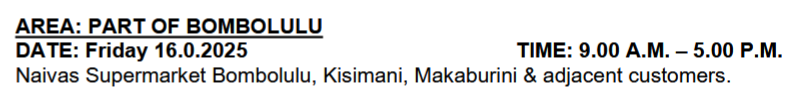

In [249]:
df.loc[586,'date'] = '2025-05-16'

In [250]:
nat_rows = df[df["date"].isna()]
print(nat_rows)

Empty DataFrame
Columns: [county, area, date, time, places, file, code, old_date, clean_date]
Index: []


No date errors now ✅